In [3]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 600; Features: 2; Clusters: 2    3
dtype: int64
          0         1
0  0.840014 -0.865379
1  0.901840 -0.597634
2  0.114248 -0.282766
3  2.171705 -0.847531
4  1.099385  0.028547


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


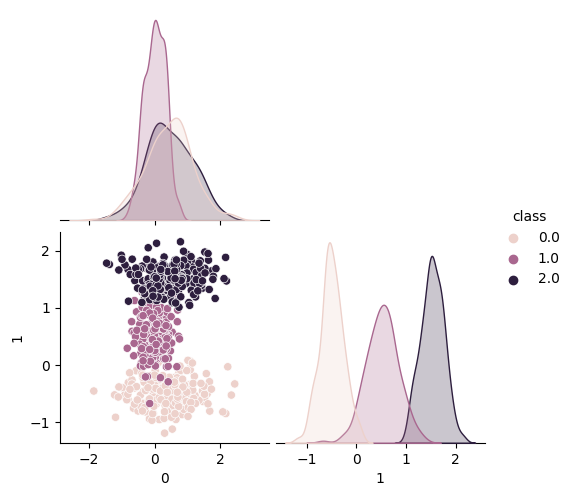

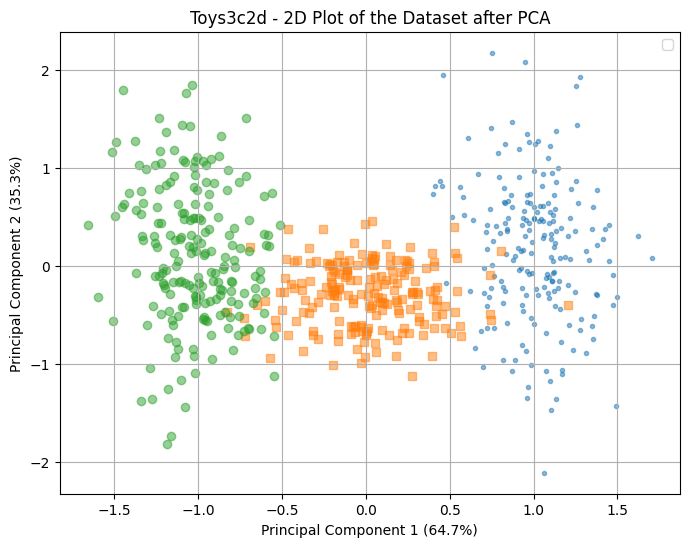

In [4]:
# fetch dataset 
df = load_toys3c2d()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Toys3c2d", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [5]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [6.140027237229511]
ARI values: [0.6410278917506528]
NS values: [1.649814151629553]
NMI values: [0.6064038117913941]


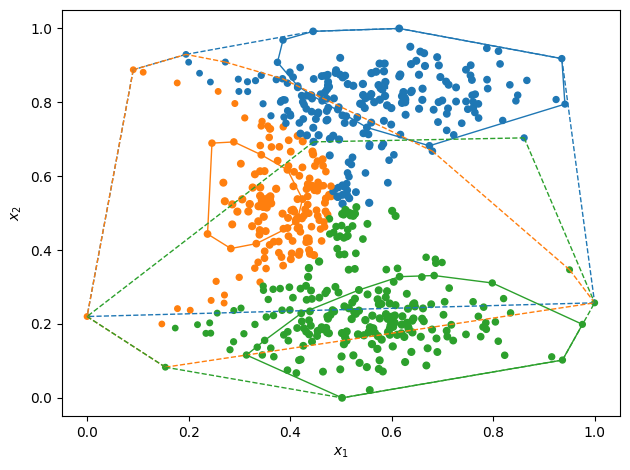

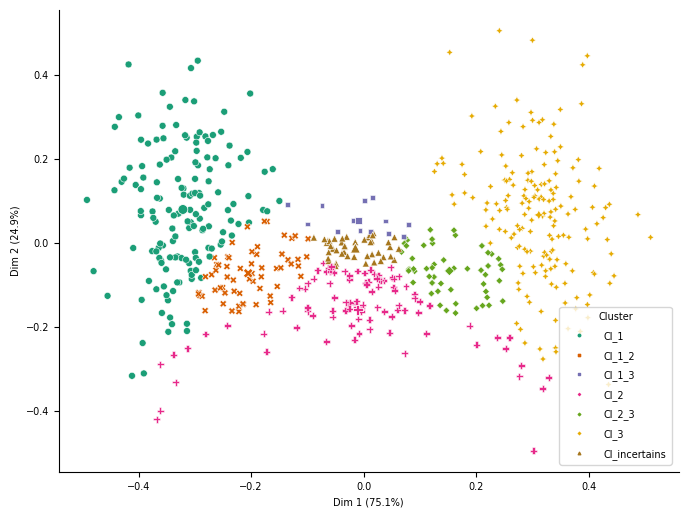

In [6]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [7]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.6067201411537382, 0.6068439911375954, 0.6068439911375954, 0.6068439911375954, 0.606843991137602, 0.606843991137602, 0.6068439911376038, 0.6068439911376038, 0.6068439911376038, 0.6068439911376038]
ARI values: [0.7218383392652996, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665, 0.7259557466108665]
NS values: [2.3486265584539745, 2.3567928093499027, 2.3567928093499027, 2.3567928093499027, 2.2842559026382876, 2.2842559026382876, 2.2118191890537546, 2.2118191890537546, 2.2118191890537546, 2.2118191890537546]
NMI values: [0.6873468091463497, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417, 0.6931959468649417]


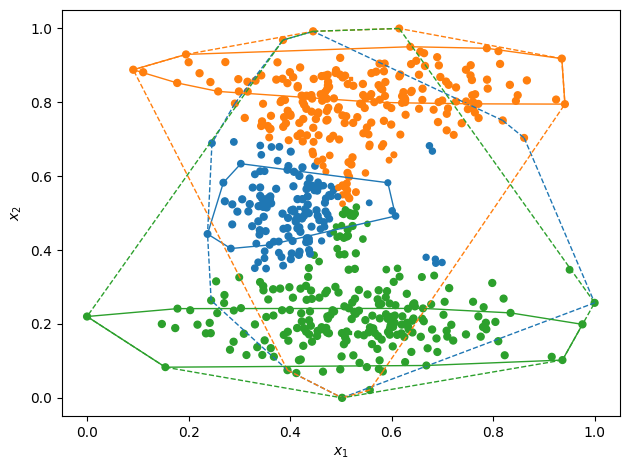

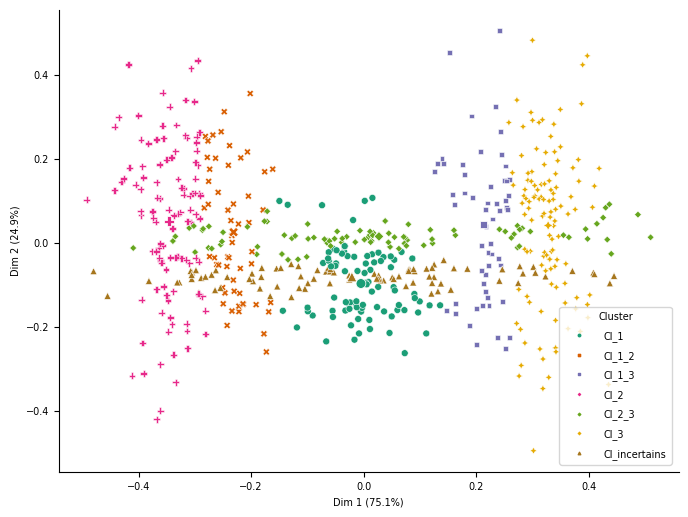

In [8]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [9]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [1.599042059379089, 1.5990420678058128, 1.5990420872247142, 1.5990421010399873, 1.5990423415195805, 1.5990423987608475, 1.5990424901947669, 1.599042505909417, 1.5990425920452198, 1.8241126907417955]
ARI values: [0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.049366423832766376]
NMI values: [0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.09737851834568491]


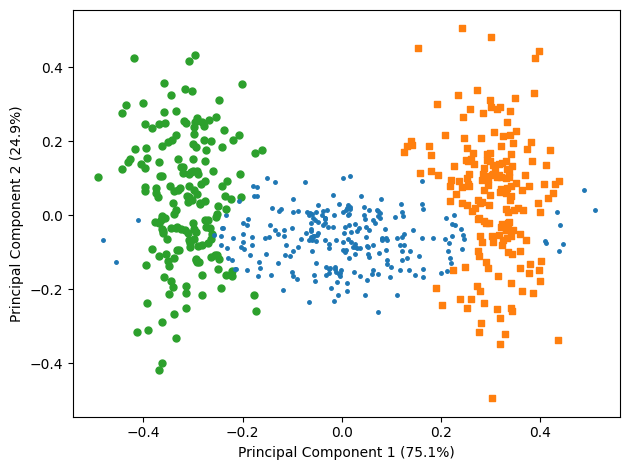

In [10]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [11]:
# %%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=2.6, verbose=True)
    wang_models = np.append(wang_models, model)

Dataset includes 600 instances, and 2 features
Initial centers: [[0.53604421 0.20802295]
 [0.4241682  0.50941702]
 [0.53955546 0.81081013]]
Initial weights: [0.5 0.5]
[1, 0.07405152732840559]]
Final initial weights: [0.49813029 0.50104453]
[1, 2.507188654176241]
[2, 2.5060795962080826]
[3, 2.505929650586899]
Dataset includes 600 instances, and 2 features
Initial centers: [[0.53604421 0.20802295]
 [0.53955546 0.81081013]
 [0.4241682  0.50941702]]
Initial weights: [0.5 0.5]
[1, 0.07405152732840559]]
Final initial weights: [0.49813029 0.50104453]
[1, 2.507188654176241]
[2, 2.5060795962080826]
[3, 2.505929650586899]


J values: [2.505929650586899, 2.505929650586899]
ARI values: [0.8800566422944107, 0.8800566422944107]
NMI values: [0.8339065429779725, 0.8339065429779726]


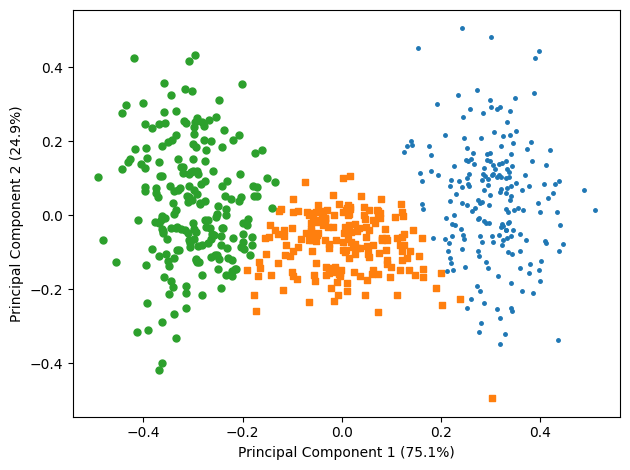

In [12]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [13]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

J values: [14.416204064317311, 14.416204064317311, 14.416204064317313, 14.416204064317313, 14.416204064317313, 14.416204064317313, 14.416204064317315, 14.416294023502697, 14.416294023502697, 14.416294023502697]
ARI values: [0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697]
NMI values: [0.8498650944760284, 0.8498650944760284, 0.8498650944760283, 0.8498650944760283, 0.8498650944760283, 0.8498650944760283, 0.8498650944760284, 0.8498650944760284, 0.8498650944760283, 0.8498650944760284]


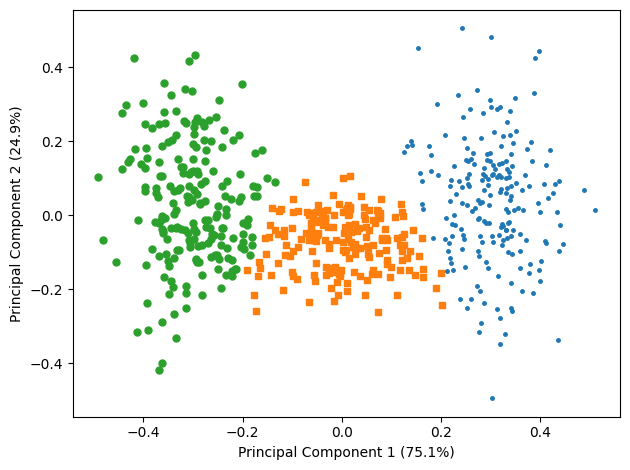

In [14]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [15]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

J values: [1.7557088635604612, 1.7557088635604616, 1.7557088635604616, 1.7557088635604616, 1.7557088635604616, 1.7557088635604616, 1.7557088635604619, 1.7557235645143423, 1.7557305193896524, 1.7557305193896524]
ARI values: [0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813]
NMI values: [0.8777359171635447, 0.8777359171635446, 0.8777359171635446, 0.8777359171635446, 0.8777359171635447, 0.8777359171635447, 0.8777359171635446, 0.8777359171635446, 0.8777359171635446, 0.8777359171635447]


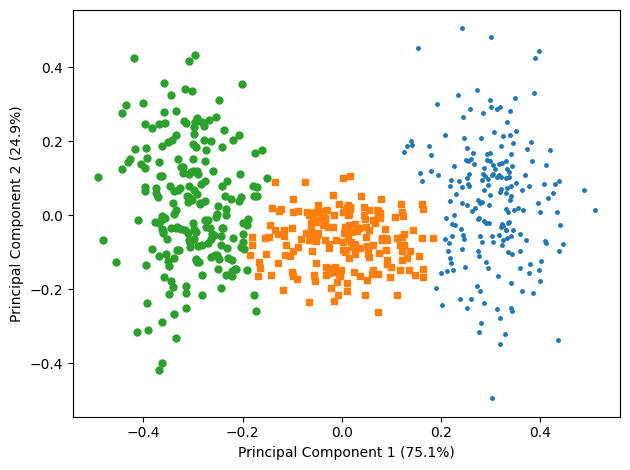

In [16]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [17]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [2.0164771310911207, 2.0164771310911207, 2.0165287745399763, 2.0165963668309352, 2.0165963668309352, 2.0166608502745325, 2.017074539265362, 2.017074539265362, 2.017074539265362, 2.0170745392653626]
ARI values: [0.048954766148800954, 0.048954766148800954, 0.04928708476910725, 0.04898976073845797, 0.04898976073845797, 0.04898976073845797, 0.04852753162891156, 0.04852753162891156, 0.04852753162891156, 0.04852753162891156]
NMI values: [0.0962371025367135, 0.0962371025367135, 0.09652638515004433, 0.09614807789863179, 0.09614807789863179, 0.09614807789863179, 0.09554065287509393, 0.09554065287509393, 0.09554065287509393, 0.09554065287509393]


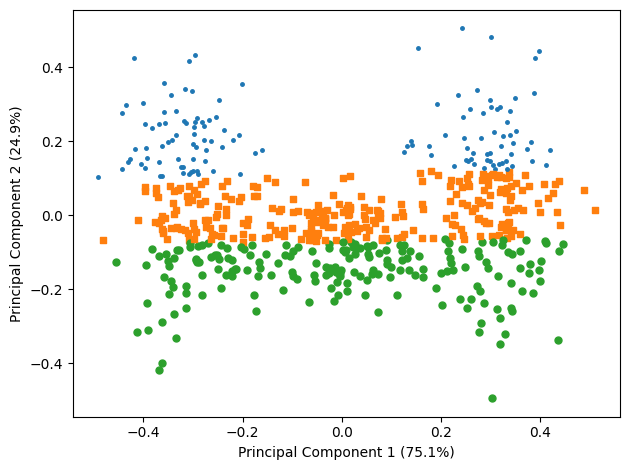

In [18]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [19]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [34.461327220412585, 34.461327220412585, 34.4613272204126, 34.461327220412606, 34.461327220412606, 34.46132775280874, 34.46132775280876, 34.46132799358103, 34.461327993581044, 34.461327993581044]
ARI values: [0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777]
NMI values: [0.09279659244630034, 0.09279659244630034, 0.09279659244630031, 0.09279659244630034, 0.09279659244630031, 0.09279659244630034, 0.09279659244630034, 0.09279659244630031, 0.09279659244630034, 0.09279659244630034]


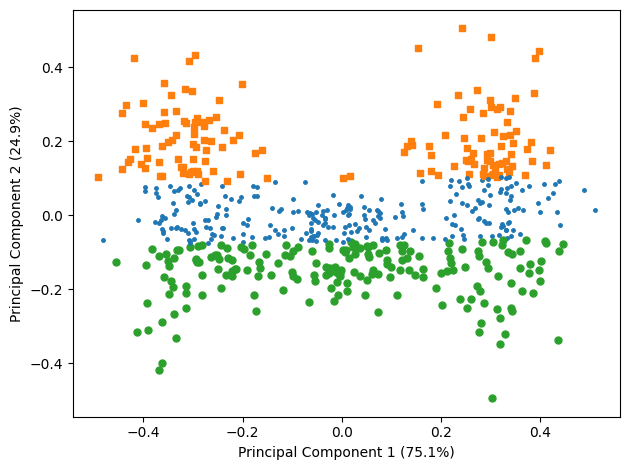

In [20]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)